In [1]:
import sqlite3 as sql
import pandas as pd

In [2]:
conn = sql.connect('database.sqlite')
pd.read_sql_query('select * from sqlite_master',conn)

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...
1,index,salaries_year_idx,Salaries,16566,CREATE INDEX salaries_year_idx ON Salaries (Year)


In [3]:
pd.read_sql_query('select * from Salaries',conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,9999999.00,567595.43,2011,,San Francisco,
1,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
2,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
3,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
4,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189082.74,,316285.74,316285.74,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148648,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148649,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148650,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [4]:
def sql_query(q):
    return pd.read_sql_query(q,conn)

Top 10 highest paid employees (by TotalPayBenefits)

In [5]:
q = '''select EmployeeName, TotalPayBenefits from salaries order by TotalPayBenefits desc limit 10
'''

sql_query(q)

,EmployeeName,TotalPayBenefits
0,NATHANIEL FORD,567595.43
1,David Shinn,510732.68
2,Amy P Hart,479652.21
3,William J Coaker Jr.,436224.36
4,Gregory P Suhr,425815.28
5,Joanne M Hayes-White,422353.40
6,Gregory P Suhr,418019.22
7,Joanne M Hayes-White,417435.10
8,Ellen G Moffatt,415767.94
9,Gary Altenberg,407274.78


Find which year has missing data of Employees with 'Not Provided'/ 'Not provided'

In [6]:
q = """
SELECT DISTINCT Year
FROM Salaries
WHERE LOWER(EmployeeName) = 'not provided'
ORDER BY Year;
"""

sql_query(q)

,Year
0,2011
1,2012
2,2014


Number of unique agencies

In [7]:
q= """
SELECT COUNT(DISTINCT Agency) AS UniqueAgencies
FROM Salaries;
"""
sql_query(q)

,UniqueAgencies
0,1


Show Average BasePay, OvertimePay, and TotalPay for year 2011

In [8]:
q= """
SELECT 
    AVG(BasePay) AS Avg_BasePay,
    AVG(OvertimePay) AS Avg_OvertimePay,
    AVG(TotalPay) AS Avg_TotalPay
FROM 
    Salaries
WHERE 
    Year = 2011;
"""
sql_query(q)

,Avg_BasePay,Avg_OvertimePay,Avg_TotalPay
0,63593.401894,4524.411277,71992.050063


Plot the top 10 job titles with the highest TotalPay in 2014.


<Axes: xlabel='JobTitle'>

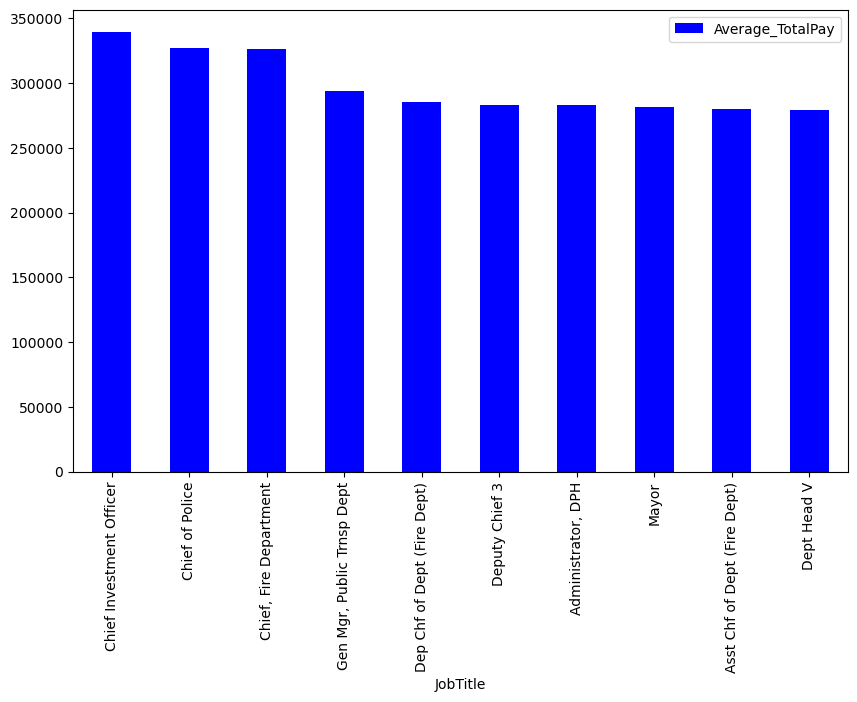

In [9]:
q= """
SELECT
    JobTitle,
    AVG(TotalPay) AS Average_TotalPay
FROM
    Salaries
WHERE
    Year = 2014
GROUP BY
    JobTitle
ORDER BY
    Average_TotalPay DESC
LIMIT 10;
"""
sql_query(q)
x = sql_query(q)
x.plot(kind='bar', x='JobTitle', y='Average_TotalPay', color='blue', figsize=(10,6))

Which job titles have overtime pay exceeding $150,000 exluding 'Not provided'

In [10]:
q = """
SELECT DISTINCT
    JobTitle
FROM
    Salaries
WHERE
    OvertimePay > 150000 
    AND LOWER(JobTitle) <> 'not provided'
ORDER BY
    JobTitle;
"""
sql_query(q)

,JobTitle
0,Deputy Sheriff
1,EMT/Paramedic/Firefighter
2,Firefighter
3,"Lieutenant, Fire Suppression"


Find all employees whose job titles contain the word “CHIEF”

In [11]:
q = """
SELECT
    EmployeeName,
    JobTitle
FROM
    Salaries
WHERE
    LOWER(JobTitle) LIKE '%chief%'
    AND EmployeeName <> 'Not Provided'
ORDER BY
    EmployeeName;
"""
sql_query(q)

,EmployeeName,JobTitle
0,AARON STEVENSON,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)"
1,ALBERT WATERS II,CHIEF DEPUTY SHERIFF
2,ALEETA VAN RUNKLE,ASSISTANT CHIEF ATTORNEY I
3,ALEX TSE,ASSISTANT CHIEF ATTORNEY I
4,ALLEN NANCE,ASST. CHIEF PROBATION OFFICER-JUVENILE PROBATION
...,...,...
622,Yvonne R Mere,Assistant Chief Attorney 1
623,ZACHARY PUMPHREY,"BATTALION CHIEF, (FIRE DEPARTMENT)"
624,Zachary Pumphrey,"Battlion Chief, Fire Suppressi"
625,Zachary W Pumphrey,"Battalion Chief, Fire Suppress"


Count how many employees have job titles containing “ENGINEER” and “Fire” in year 2012 and 2013

In [12]:
q = """
SELECT
    COUNT(*) AS EmployeeCount
FROM
    Salaries
WHERE
    LOWER(JobTitle) LIKE '%engineer%'
    AND LOWER(JobTitle) LIKE '%fire%'
    AND Year IN (2012, 2013);
"""
sql_query(q)

,EmployeeCount
0,16


Distinct job titles starting with "CAPTAIN"


In [13]:
q = """
SELECT DISTINCT
    JobTitle
FROM
    Salaries
WHERE
    JobTitle LIKE 'CAPTAIN%' 
    OR JobTitle LIKE 'Captain%'
    OR JobTitle LIKE 'captain%'
ORDER BY
    JobTitle;
"""
sql_query(q)

,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,"CAPTAIN, BUREAU OF FIRE PREVENTION AND PUBLIC ..."
2,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES"
3,"CAPTAIN, FIRE SUPPRESSION"
4,Captain 3
5,"Captain, (Fire Department)"
6,"Captain, Emergency Med Svcs"
7,"Captain, Fire Suppression"


Employees having basepay > 50k and totalpay < 150000 exlucding 'Not Provided'

In [14]:
q = """
SELECT
    EmployeeName,
    JobTitle,
    BasePay,
    TotalPay
FROM
    Salaries
WHERE
    BasePay > 50000 
    AND TotalPay < 150000 
    AND EmployeeName <> 'Not Provided' -- Handles mixed case names if they exist
    AND EmployeeName <> 'NOT PROVIDED'
ORDER BY
    TotalPay DESC;
"""
sql_query(q)

,EmployeeName,JobTitle,BasePay,TotalPay
0,Kevin Salas,Firefighter,110847.11,149989.01
1,Augustine W Cheung,Transit Supervisor,87955.38,149988.30
2,JAY DOWKE,POLICE OFFICER III,112380.37,149987.24
3,Delene Wolf,Dept Head I,146497.5,149983.50
4,Hernan R Villalobos,Police Officer 2,116584,149981.35
...,...,...,...,...
87257,David P Kucia,Police Officer 3,,0.00
87258,Not provided,Not provided,Not Provided,0.00
87259,Not provided,Not provided,Not Provided,0.00
87260,Not provided,Not provided,Not Provided,0.00
